## Assignment - TensorFlow and Keras Build various MLP architectures for MNIST dataset

**In this assignment we have to try three different MLP architecture on MNIST data set. We have input as 784 and output as 10.**



**The task is to try 3 different MLP architecture, with Batch Normalization, Dropout as Regularizer, ReLU as Activation function and Adam as Optimizer.**


**We will try following architectures** 

**Architecture 1 :  MLP+ Adam + BN + ReLu + Dropout (0.5) + 2 Hidden Layer **

**Architecture 2 :  MLP+ Adam + BN + ReLu + Dropout (0.3) + 3 Hidden Layer **

**Architecture 3 :  MLP+ Adam + BN + ReLu + Dropout (0.2) + 5 Hidden Layer **



**Output: The expected output for this assignment is the plot between Train/test loss vs Epoch and Accuracy for all the models we train .**


In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
import warnings
warnings.filterwarnings('ignore')
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [8]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [9]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [10]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

## Architecture 1 : MLP + Adam + BN + ReLu + Dropout (0.5)  with 2 Hidden Layer ( 512 - 256) 

In [11]:
MLP_model_2Layers = Sequential()
MLP_model_2Layers.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
MLP_model_2Layers.add(BatchNormalization())
MLP_model_2Layers.add(Dropout(0.5))

MLP_model_2Layers.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
MLP_model_2Layers.add(BatchNormalization())
MLP_model_2Layers.add(Dropout(0.5))



MLP_model_2Layers.add(Dense(output_dim, activation='softmax'))
MLP_model_2Layers.summary()
MLP_model_2Layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_2layers_b_d = MLP_model_2Layers.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
________________________________________________

Test score: 0.0554369732551655
Test accuracy: 0.982200026512146


<IPython.core.display.Javascript object>


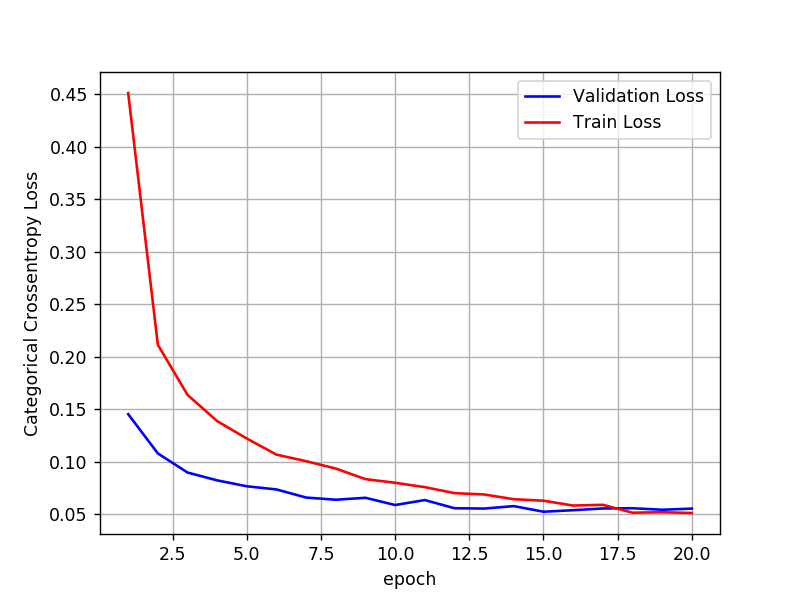

In [12]:
score = MLP_model_2Layers.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history_2layers_b_d.history['val_loss']
ty = history_2layers_b_d.history['loss']
plt_dynamic(x, vy, ty, ax)


## Architecture 2 :  MLP+ Adam + BN + ReLu + Dropout (0.3) with 3 Hidden Layer  ( 512- 256 -128)

In [13]:
MLP_model_3Layers = Sequential()
MLP_model_3Layers.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
MLP_model_3Layers.add(BatchNormalization())
MLP_model_3Layers.add(Dropout(0.3))

MLP_model_3Layers.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
MLP_model_3Layers.add(BatchNormalization())
MLP_model_3Layers.add(Dropout(0.3))

MLP_model_3Layers.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
MLP_model_3Layers.add(BatchNormalization())
MLP_model_3Layers.add(Dropout(0.3))

MLP_model_3Layers.add(Dense(output_dim, activation='softmax'))
MLP_model_3Layers.summary()
MLP_model_3Layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_b_d = MLP_model_3Layers.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

Test score: 0.06012513352438982
Test accuracy: 0.9835000038146973


<IPython.core.display.Javascript object>


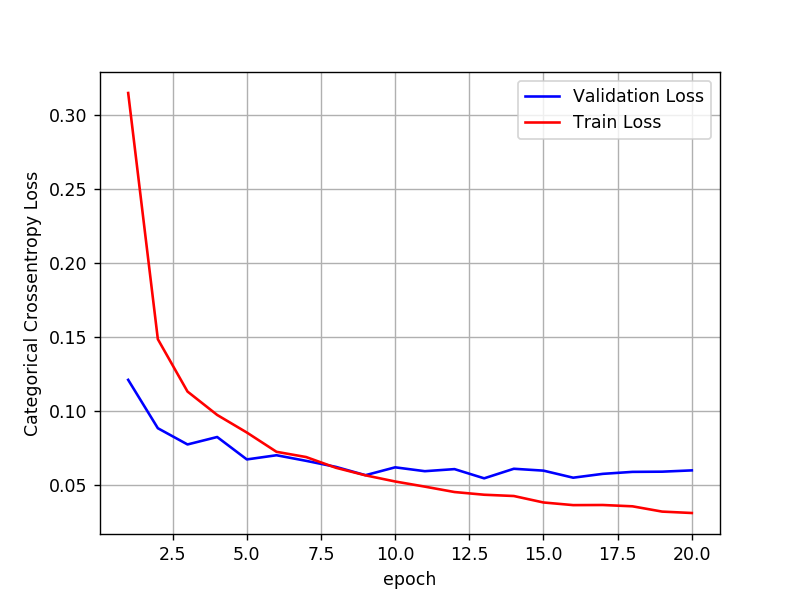

In [14]:
score = MLP_model_3Layers.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history_b_d.history['val_loss']
ty = history_b_d.history['loss']
plt_dynamic(x, vy, ty, ax)

## Architecture 3 :  MLP+ Adam + BN + ReLu + Dropout (0.2) with 5 Hidden  Layer ( 512- 256 -128 – 64 - 32)

In [15]:
MLP_model_5Layers = Sequential()
MLP_model_5Layers.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
MLP_model_5Layers.add(BatchNormalization())
MLP_model_5Layers.add(Dropout(0.2))

MLP_model_5Layers.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
MLP_model_5Layers.add(BatchNormalization())
MLP_model_5Layers.add(Dropout(0.2))

MLP_model_5Layers.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)))
MLP_model_5Layers.add(BatchNormalization())
MLP_model_5Layers.add(Dropout(0.2))

MLP_model_5Layers.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)))
MLP_model_5Layers.add(BatchNormalization())
MLP_model_5Layers.add(Dropout(0.2))

MLP_model_5Layers.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.144, seed=None)))
MLP_model_5Layers.add(BatchNormalization())
MLP_model_5Layers.add(Dropout(0.2))

MLP_model_5Layers.add(Dense(output_dim, activation='softmax'))
MLP_model_5Layers.summary()
MLP_model_5Layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_5layers_b_d = MLP_model_5Layers.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

Test score: 0.06700490548466333
Test accuracy: 0.9829000234603882


<IPython.core.display.Javascript object>


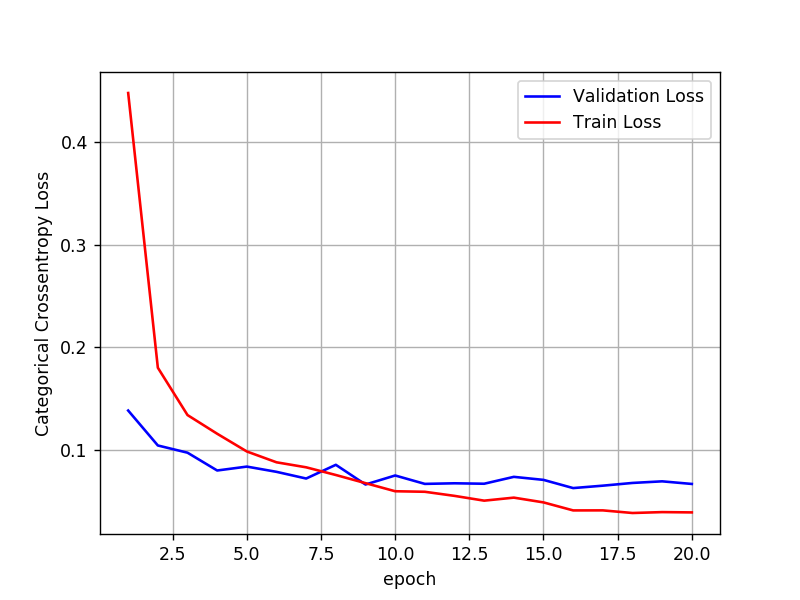

In [16]:
score = MLP_model_5Layers.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history_5layers_b_d.history['val_loss']
ty = history_5layers_b_d.history['loss']
plt_dynamic(x, vy, ty, ax)


# Conclusion 

In [17]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Sr. No", "Model", "Hidden Layer Info", "Test Accuracy (%)"]
x.add_row(["Architecture 1 ",  "MLP+ Adam + BN + ReLu + Dropout (0.5) + 2  Layer   ", "512 - 256", 98.22])
x.add_row(["Architecture 2 ",  " MLP+ Adam + BN + ReLu + Dropout (0.3) + 3  Layer     ","512 - 256 -128" , 98.35])
x.add_row(["Architecture 3 ", "MLP+ Adam + BN + ReLu + Dropout (0.2) + 5  Layer   ","512- 256 -128 - 64 - 32", 98.29])
print(x)

+-----------------+--------------------------------------------------------+-------------------------+-------------------+
|      Sr. No     |                         Model                          |    Hidden Layer Info    | Test Accuracy (%) |
+-----------------+--------------------------------------------------------+-------------------------+-------------------+
| Architecture 1  |  MLP+ Adam + BN + ReLu + Dropout (0.5) + 2  Layer      |        512 - 256        |       98.22       |
| Architecture 2  |  MLP+ Adam + BN + ReLu + Dropout (0.3) + 3  Layer      |      512 - 256 -128     |       98.35       |
| Architecture 3  |  MLP+ Adam + BN + ReLu + Dropout (0.2) + 5  Layer      | 512- 256 -128 - 64 - 32 |       98.29       |
+-----------------+--------------------------------------------------------+-------------------------+-------------------+
